In [5]:
import sys
import warnings
warnings.filterwarnings('ignore')
import glob
!{sys.executable} -m pip install numpy pandas matplotlib scikit-learn pyarrow seaborn imblearn xgboost| grep -v 'already satisfied'

#

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
df = pd.read_csv("data/train.csv")

In [7]:
df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

<Axes: >

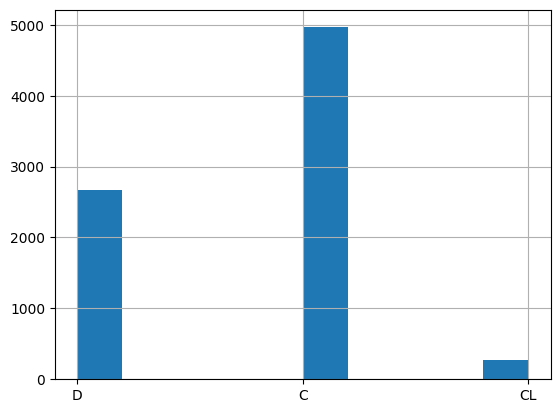

In [9]:
df["Status"].hist()

In [10]:
# unbalanced init!

In [11]:
df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [12]:
df.dtypes

id                 int64
N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [13]:
NaN_count = df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

In [14]:
# nothing empty! lez go

In [15]:
df.nunique()

id               7905
N_Days            461
Drug                2
Age               391
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Edema               3
Bilirubin         111
Cholesterol       226
Albumin           160
Copper            171
Alk_Phos          364
SGOT              206
Tryglicerides     154
Platelets         227
Prothrombin        49
Stage               4
Status              3
dtype: int64

In [16]:
# create train and validation sets that are divided equally

In [17]:
from sklearn.model_selection import train_test_split

train, validation = train_test_split(df, stratify=df["Status"], test_size=0.2)

In [18]:
# Distribution in the train and validation set

Text(0.5, 0.98, 'Distribution of Disruptions in Training and Test Sets')

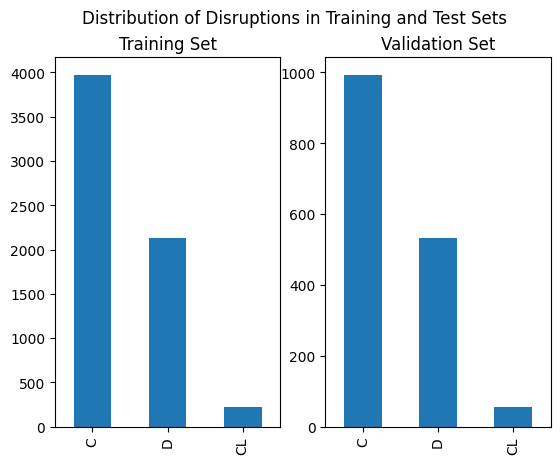

In [19]:
plt.subplot(1,2,1)
#train['Status'].hist()
train["Status"].value_counts().plot(kind="bar")

plt.title("Training Set")

plt.subplot(1,2,2)
#validation["Status"].hist()
validation["Status"].value_counts().plot(kind="bar")

plt.title("Validation Set")

plt.suptitle("Distribution of Disruptions in Training and Test Sets")

In [20]:
#the distribution is similar in training and test set

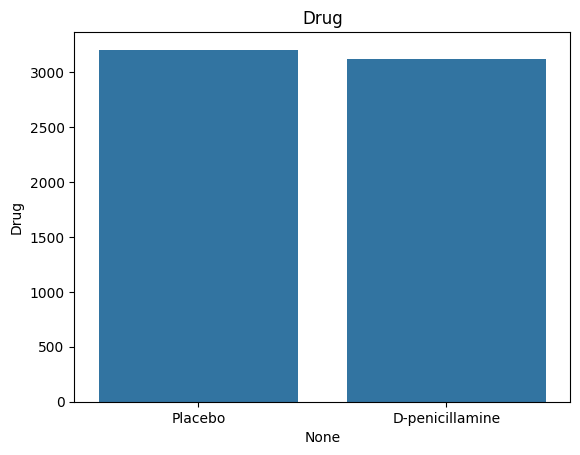

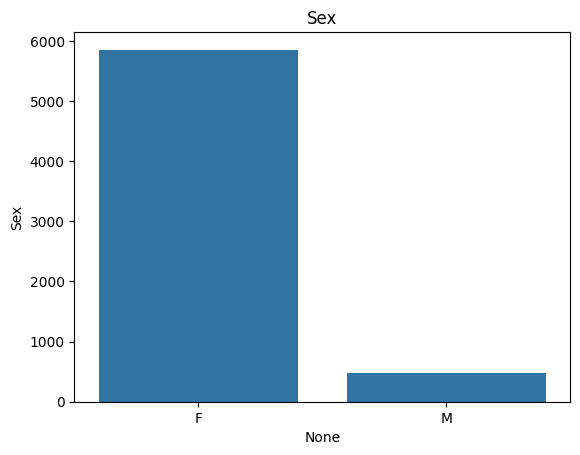

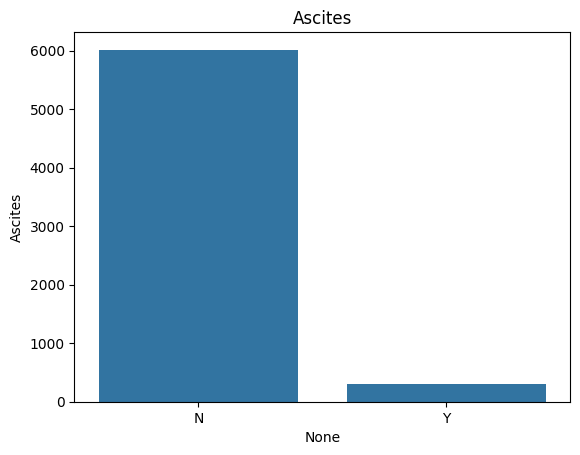

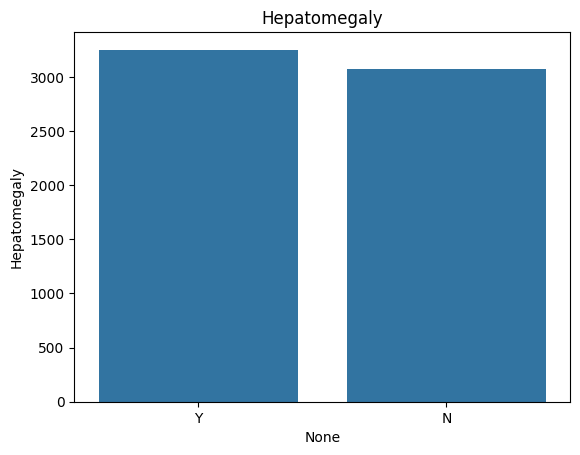

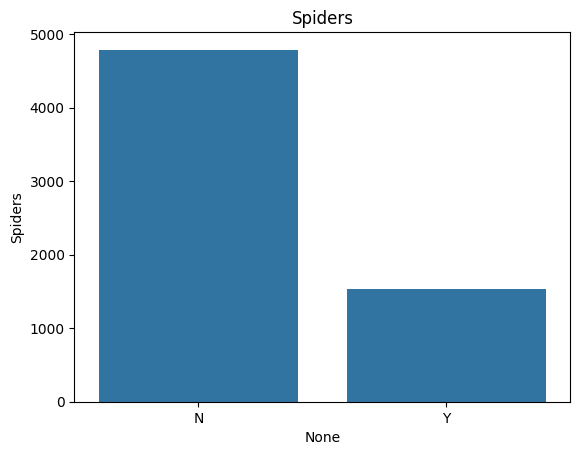

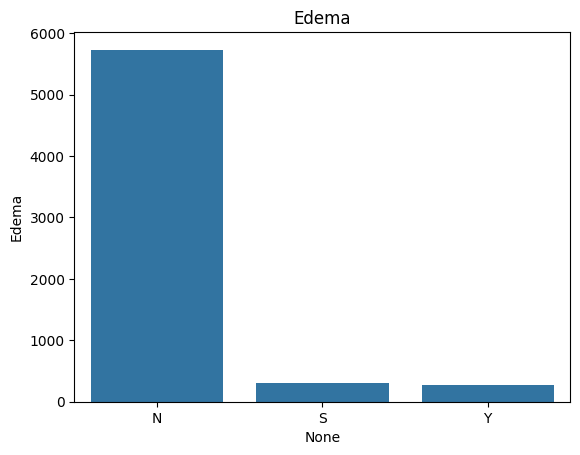

In [21]:
import seaborn as sns

categorical_values = ["Drug","Sex","Ascites","Hepatomegaly","Spiders","Edema"]

for i in categorical_values:
    sns.barplot(x=train[i].value_counts().index,y=train[i].value_counts()).set_title(i)
    plt.show()

In [22]:
# i should have done the stratified split which included sex, ascites, spiders, edema

In [23]:
# Will do it in the next iteration

In [24]:
train.Drug.replace(("Placebo", "D-penicillamine"), (0,1), inplace = True)
train.Sex.replace(("F", "M"), (0,1), inplace = True)
train.Ascites.replace(("N", "Y"), (0,1), inplace = True)
train.Hepatomegaly.replace(("N", "Y"), (0,1), inplace = True)
train.Spiders.replace(("N", "Y"), (0,1), inplace = True)
# train.Edema.replace(("N", "Y", "S"), (0,1,2), inplace = True)

In [25]:
#one hot encode the status and edema

In [26]:
status_dummies = pd.get_dummies(train.Status)
edema_dummies = pd.get_dummies(train.Edema)
train = pd.concat([train, edema_dummies, status_dummies], axis=1)

In [27]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N,S,Y,C,CL,D
4785,4785,1420,1,12979,1,0,0,0,N,0.8,263.0,3.77,30.0,696.0,57.35,84.0,344.0,9.6,2.0,C,1,0,0,1,0,0
2200,2200,2990,1,22960,0,0,1,0,N,0.9,399.0,3.60,79.0,3472.0,155.00,152.0,248.0,10.1,3.0,C,1,0,0,1,0,0
1670,1670,673,1,18719,0,1,1,1,S,3.4,374.0,3.60,45.0,1428.0,190.00,69.0,258.0,12.0,4.0,D,0,1,0,0,0,1
2245,2245,2580,1,19470,0,0,0,0,N,0.5,248.0,3.26,29.0,674.0,74.40,121.0,269.0,10.0,2.0,C,1,0,0,1,0,0
3515,3515,4039,0,22173,0,0,1,1,N,2.1,267.0,2.54,89.0,733.0,196.85,90.0,183.0,11.6,4.0,D,1,0,0,0,0,1


In [28]:
train.N.replace((False,True), (0,1), inplace = True)
train.S.replace((False,True), (0,1), inplace = True)
train.Y.replace((False,True), (0,1), inplace = True)
train.C.replace((False,True), (0,1), inplace = True)
train.CL.replace((False,True), (0,1), inplace = True)
train.D.replace((False,True), (0,1), inplace = True)

In [29]:
train = train.drop("Edema",axis = 1)
train = train.drop("Status",axis = 1)

In [30]:
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
4785,4785,1420,1,12979,1,0,0,0,0.8,263.0,3.77,30.0,696.0,57.35,84.0,344.0,9.6,2.0,1,0,0,1,0,0
2200,2200,2990,1,22960,0,0,1,0,0.9,399.0,3.60,79.0,3472.0,155.00,152.0,248.0,10.1,3.0,1,0,0,1,0,0
1670,1670,673,1,18719,0,1,1,1,3.4,374.0,3.60,45.0,1428.0,190.00,69.0,258.0,12.0,4.0,0,1,0,0,0,1
2245,2245,2580,1,19470,0,0,0,0,0.5,248.0,3.26,29.0,674.0,74.40,121.0,269.0,10.0,2.0,1,0,0,1,0,0
3515,3515,4039,0,22173,0,0,1,1,2.1,267.0,2.54,89.0,733.0,196.85,90.0,183.0,11.6,4.0,1,0,0,0,0,1


In [31]:
train.dtypes

id                 int64
N_Days             int64
Drug               int64
Age                int64
Sex                int64
Ascites            int64
Hepatomegaly       int64
Spiders            int64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
N                  uint8
S                  uint8
Y                  uint8
C                  uint8
CL                 uint8
D                  uint8
dtype: object

In [32]:
numeric_values = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [33]:
#visualise corelation matrix

In [34]:
train.corr()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
id,1.000000,-0.010069,0.003578,-0.006473,-0.005847,0.013857,0.007227,0.009884,0.003806,-0.005037,-0.019098,0.009525,-0.002079,0.012385,-0.008922,0.000657,0.009932,-0.012618,-0.004704,-0.004457,0.011354,-0.002338,0.008319,-0.000834
N_Days,-0.010069,1.000000,-0.000329,-0.095065,-0.059688,-0.260642,-0.288864,-0.223032,-0.361206,-0.148295,0.262143,-0.292642,-0.020319,-0.245586,-0.183137,0.158804,-0.158026,-0.233078,0.252020,-0.100291,-0.251282,0.355141,-0.075068,-0.333996
Drug,0.003578,-0.000329,1.000000,0.092811,0.049325,0.052016,-0.060710,-0.001685,-0.033710,0.001407,-0.036882,-0.004261,0.005476,-0.046362,-0.050548,-0.018356,-0.043782,-0.037141,-0.032297,0.002882,0.042699,-0.023478,0.023114,0.015044
Age,-0.006473,-0.095065,0.092811,1.000000,0.110748,0.152165,0.105923,0.065846,0.088579,-0.061505,-0.116686,0.080655,0.016570,-0.028651,0.009117,-0.088613,0.138441,0.120135,-0.139311,0.072337,0.121113,-0.129757,-0.111346,0.175824
Sex,-0.005847,-0.059688,0.049325,0.110748,1.000000,0.038900,0.064235,-0.030366,0.043382,0.032474,-0.017867,0.152850,0.008383,0.059672,0.074856,-0.049258,0.067928,0.042909,-0.061588,0.076997,0.006148,-0.123815,0.011755,0.122031
Ascites,0.013857,-0.260642,0.052016,0.152165,0.038900,1.000000,0.189541,0.215435,0.378851,-0.044964,-0.327416,0.275186,0.051611,0.107975,0.133559,-0.173665,0.288805,0.170682,-0.531515,0.090618,0.657239,-0.262671,-0.023015,0.277475
Hepatomegaly,0.007227,-0.288864,-0.060710,0.105923,0.064235,0.189541,1.000000,0.339664,0.298679,0.143310,-0.267560,0.278303,0.120809,0.205405,0.161872,-0.192231,0.247478,0.500125,-0.225558,0.136752,0.175425,-0.393351,0.036092,0.388171
Spiders,0.009884,-0.223032,-0.001685,0.065846,-0.030366,0.215435,0.339664,1.000000,0.256531,0.041485,-0.230649,0.278773,0.069777,0.145556,0.080611,-0.170792,0.282111,0.293446,-0.267378,0.136589,0.234814,-0.333208,0.035348,0.326969
Bilirubin,0.003806,-0.361206,-0.033710,0.088579,0.043382,0.378851,0.298679,0.256531,1.000000,0.314205,-0.310617,0.451450,0.129002,0.371293,0.335442,-0.075903,0.290725,0.199768,-0.325084,0.148074,0.304437,-0.415808,0.016684,0.418654
Cholesterol,-0.005037,-0.148295,0.001407,-0.061505,0.032474,-0.044964,0.143310,0.041485,0.314205,1.000000,-0.085107,0.172610,0.130776,0.326144,0.277361,0.096189,0.020051,0.038539,0.022746,0.008713,-0.041382,-0.189683,0.061058,0.170263


<Axes: >

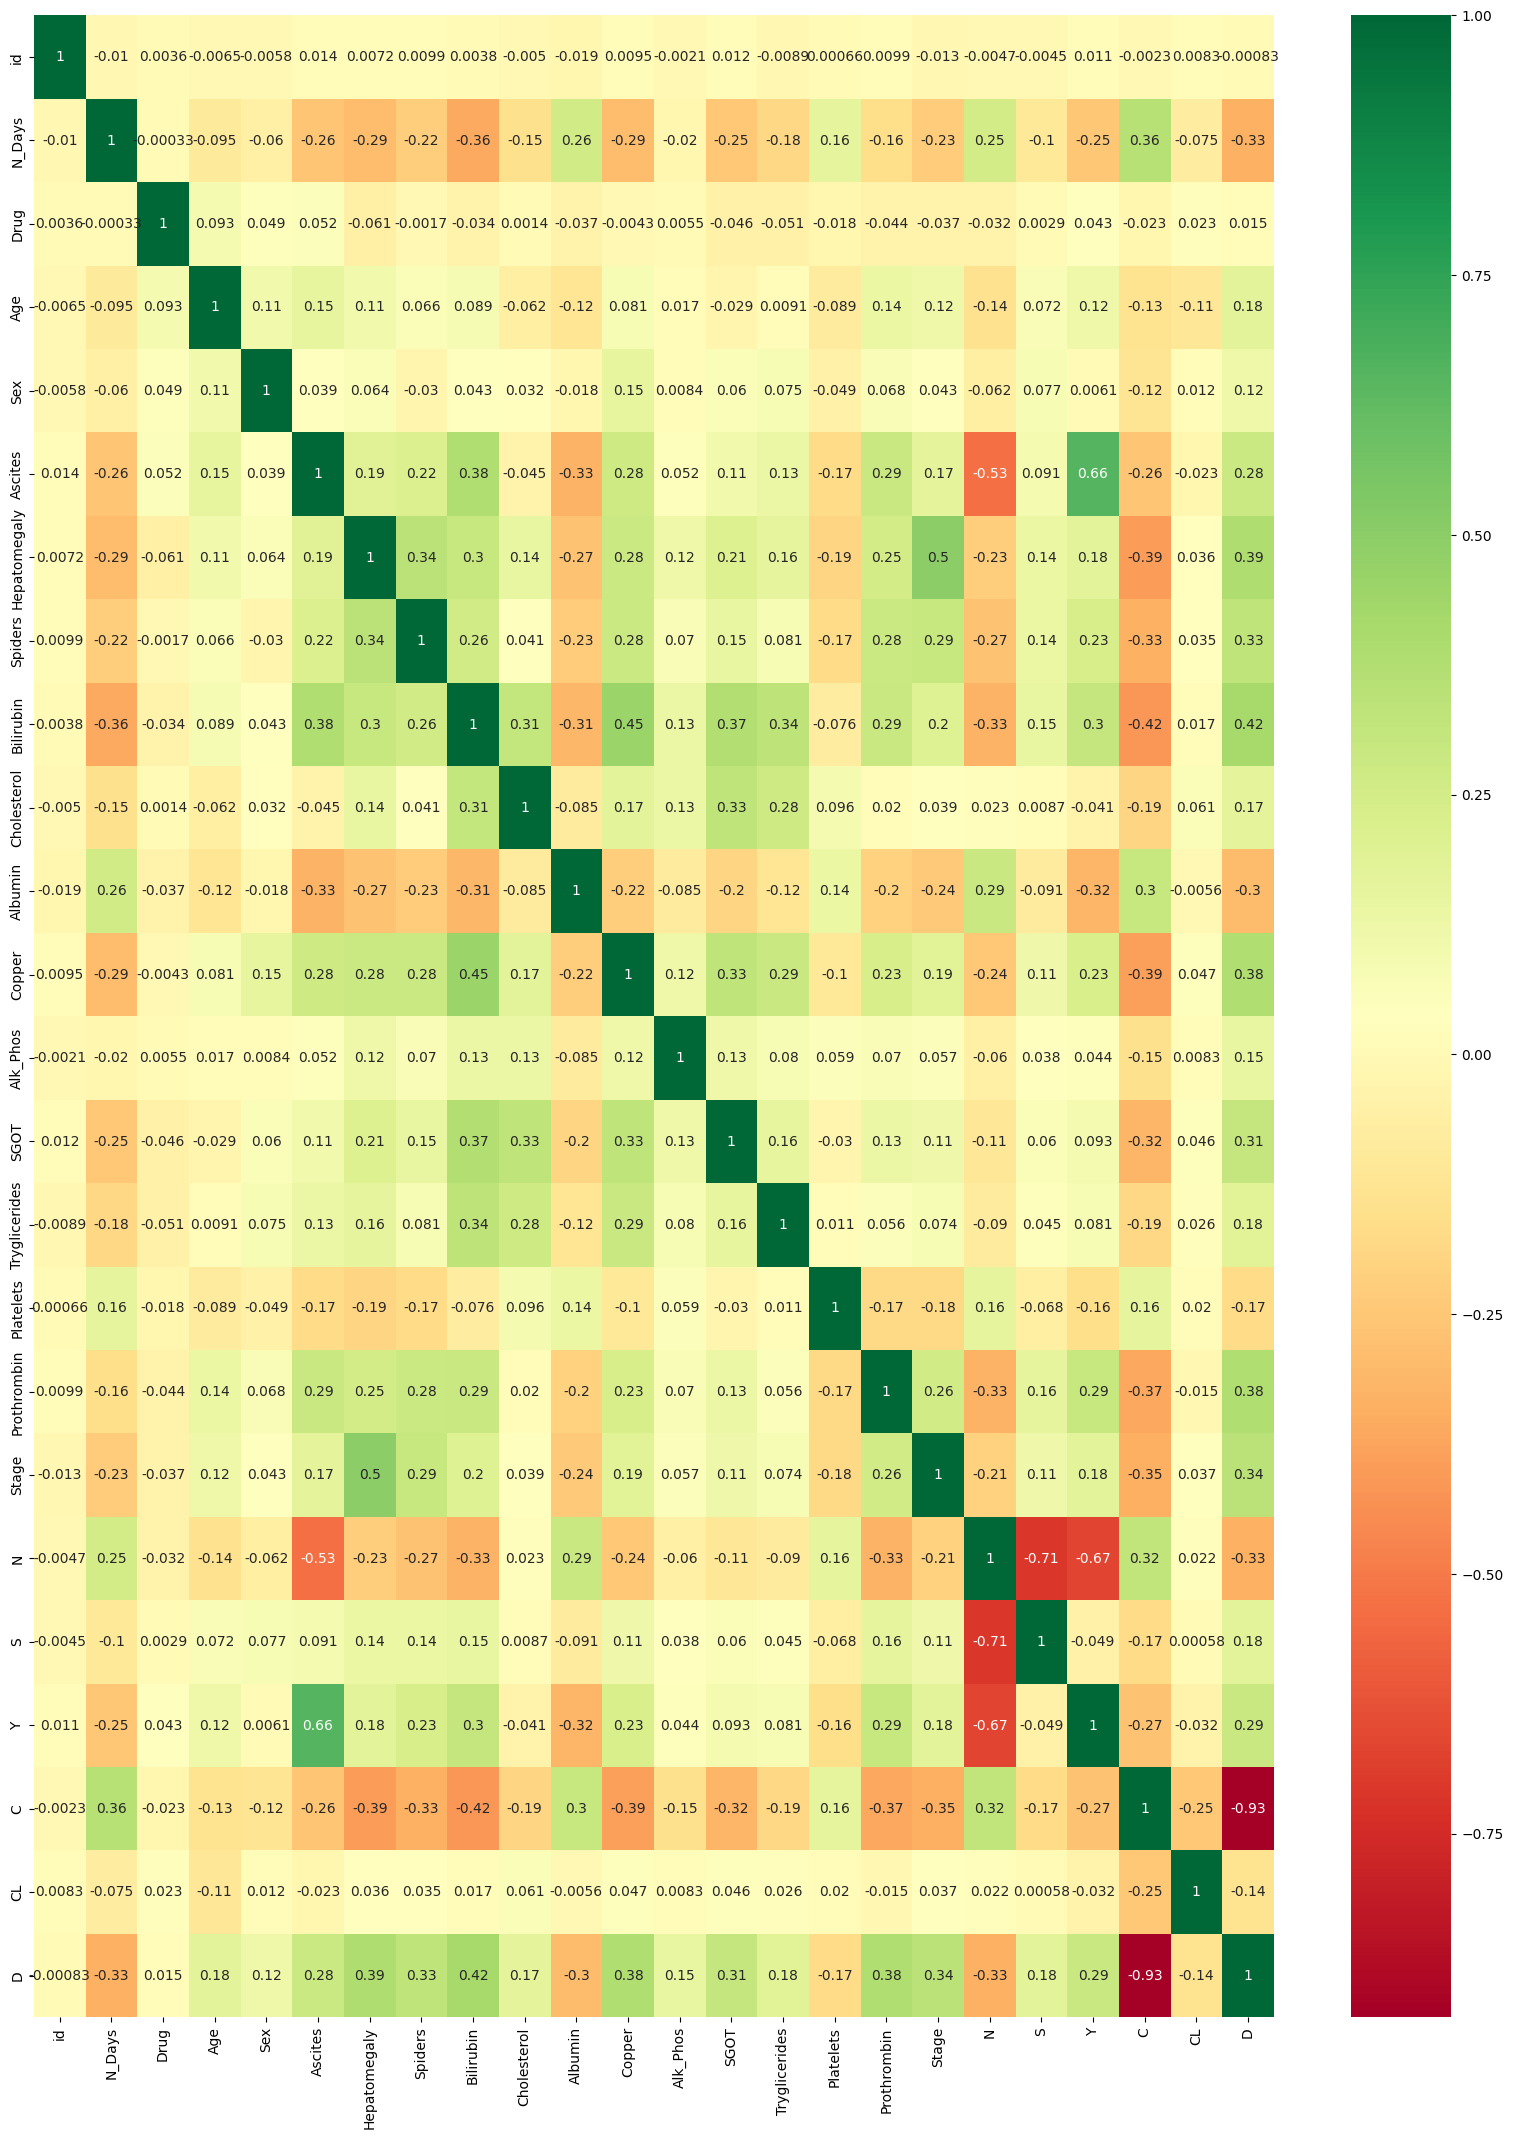

In [35]:
plt.figure(figsize=(20,26))
sns.heatmap(train.corr(), annot=True, cmap="RdYlGn")

In [36]:
features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]

In [ ]:
train.hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [ ]:
#Most of the data here needs to be normalised, mostly right skewed

In [ ]:
# lets look at the ones that matter

In [ ]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import FunctionTransformer

features_to_scale = ["N_Days","Age","Bilirubin","Cholesterol","Albumin","Copper","Alk_Phos","SGOT","Tryglicerides","Platelets","Prothrombin","Stage"]
# scaler_minmax = MinMaxScaler()
# train[features_to_scale] = scaler_minmax.fit_transform(train[features_to_scale])
transformer = FunctionTransformer(np.log1p)
train[features_to_scale] = transformer.transform(train[features_to_scale])

In [ ]:
# viz after scaling

In [ ]:
train[features_to_scale].hist(bins=50, figsize=(20,15))
plt.suptitle("Distribution of Numeric Data")
plt.show()

In [ ]:
#looks scaled!!! atleast a bit, cause data is on a similar scale

In [ ]:
ax = train[["C","CL","D"]].value_counts().plot.pie(autopct="%.2f")
_ = ax.set_title("Target Label Distribution")

In [ ]:
# looking at the target distribution, it looks like there's a big imbalence....... We need to balance the data ......

In [ ]:
# for the next step i presume

In [ ]:
train.info()

In [ ]:
#This function randomly deletes attributes
def make_random_nans(df, percent_rows, percent_columns):
    num_rows_to_nan = int(percent_rows * len(df))
    num_columns_to_nan = int(percent_columns * len(df.columns))

    rows_to_nan = np.random.choice(df.index, num_rows_to_nan, replace=False)

    for row in rows_to_nan:
        columns_to_nan = np.random.choice(df.columns, num_columns_to_nan, replace=False)
        df.loc[row, columns_to_nan] = np.nan

In [ ]:
#its better not to disturb the train set. Let's create a copy instead.
train_copy = train.copy()

In [ ]:
# Making 10% of random attributes NaN in 10% of random rows
make_random_nans(train_copy, 0.1, 0.1)

In [ ]:
train_copy.info()

In [ ]:
NaN_count = train_copy.isna().sum(axis = 0)
NaN_count

## KNN imputation

In [ ]:
from sklearn.impute import KNNImputer

In [ ]:
train_copy.head()

In [ ]:
# Initialise the KNNImputer
imputer = KNNImputer(n_neighbors=5)

In [ ]:
# Fit on the dataset and transform it to impute missing values
KNN_imputed_data = imputer.fit_transform(train_copy)

In [ ]:
# Convert the imputed data back to a pandas DataFrame
KNN_imputed_df = pd.DataFrame(KNN_imputed_data, columns=train.columns)

In [ ]:
# Check no values are missing
NaN_count = KNN_imputed_df.isna().sum(axis = 0)
NaN_count

In [ ]:
KNN_imputed_df.head()

## Median Imputation

In [61]:
from sklearn.impute import SimpleImputer

In [63]:
#Initialise the Simple Imputer with the median strategy
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [65]:
#Fit on dataset and transform it to impute the missing value
Median_imputed_dataset = imputer.fit_transform(train_copy)

In [67]:
# Convert the imputed data back to a pandas DataFrame
Median_imputed_df = pd.DataFrame(Median_imputed_dataset, columns=train.columns)

In [68]:
# Check no values are missing
NaN_count = Median_imputed_df.isna().sum(axis = 0)
NaN_count

id               0
N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
N                0
S                0
Y                0
C                0
CL               0
D                0
dtype: int64

In [69]:
Median_imputed_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N,S,Y,C,CL,D
0,3937.0,7.259116,1.0,9.471165,0.0,0.0,0.0,0.0,0.587787,5.575949,1.562346,3.433987,6.546785,4.066459,4.442651,5.843544,2.360854,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
1,2200.0,8.003363,1.0,10.041552,0.0,0.0,1.0,0.0,0.641854,5.991465,1.526056,4.382027,8.152774,5.049856,5.030438,5.517453,2.406945,1.386294,1.0,0.0,0.0,1.0,0.0,0.0
2,1670.0,6.513230,1.0,9.836706,0.0,1.0,1.0,1.0,1.481605,5.926926,1.526056,3.828641,7.264730,5.252273,4.248495,5.556828,2.564949,1.609438,0.0,1.0,0.0,0.0,0.0,1.0
3,2245.0,7.855932,1.0,9.876681,0.0,0.0,0.0,0.0,0.405465,5.517453,1.449269,3.401197,7.069023,4.322807,4.804021,5.583496,2.397895,1.098612,1.0,0.0,0.0,1.0,0.0,0.0
4,3515.0,8.304000,0.0,10.006676,0.0,0.0,1.0,1.0,1.131402,5.590987,1.264127,4.499810,6.598509,5.287509,4.510860,5.214936,2.533697,1.609438,1.0,0.0,0.0,0.0,0.0,1.0
